
# 🏡 Project Portfolio Lab: Predicting House Prices (Multiple Linear Regression, Ridge & LASSO)

**Dataset:** `house_prices_portfolio.csv`    
**Goal:** Build and understand linear models to predict house prices.


## 🎯 Problem Statement
A real-estate analytics team wants to estimate **house prices** in a city using property and neighborhood features. Your task is to:
1. Explore the dataset and understand the relationships.
2. Build a **Multiple Linear Regression** model and interpret results.
3. Validate **assumptions** (linearity, independence, homoscedasticity, normality, multicollinearity, outliers).
4. Apply **variable selection** and **regularization** (Ridge/LASSO) to improve generalization.
5. **Persist** the best-performing model (save & load) for future use.

> This PPL mimics the workflow you'd follow in a real project and is perfect for your portfolio.


## ✅ What you'll learn
- Load and explore a dataset (EDA)  
- Build a **Multiple Linear Regression** model (`LinearRegression`)  
- Check basic assumptions with simple plots and tests  
- Understand **overfitting vs. generalization** (train vs. test performance)  
- Improve models with **Ridge (L2)** and **LASSO (L1)** regularization  
- **Save** and **load** a trained model using `pickle`  


### 🏠 House Prices Portfolio Data Dictionary

| **Column**                | **Type**             | **Notes**                                                                 |
|----------------------------|----------------------|--------------------------------------------------------------------------|
| **House_Price**            | float (1,000s)       | Target variable                                                          |
| **Lot_Size**               | int (m²)             | Land area; drives price; induces heteroscedasticity                      |
| **Bedrooms**               | int (count)          | More bedrooms generally increase price                                   |
| **Bathrooms**              | int (count)          | Correlated with bedrooms; affects price                                  |
| **House_Age**              | int (years)          | Older homes tend to be cheaper                                           |
| **Distance_to_CityCenter** | float (km)           | Further is cheaper on average                                            |
| **Crime_Rate**             | float (0–100 index)  | Higher crime lowers price                                                |
| **Nearby_Schools**         | int (count)          | More schools generally increase price                                    |
| **Monthly_Income**         | float ($)            | Large scale; correlated with energy score                                |
| **Renovated**              | int (0/1)            | Recently renovated boosts price                                          |
| **Energy_Efficiency_Score**| float (0–100)        | Correlated with income & renovation                                      |
| **Garden_Size**            | float (m²)           | Weak/low signal; useful for LASSO demonstration                          |
| **Noise_Level**            | float (0–10)         | Weak/low signal; inversely correlated with price; LASSO may drop         |


In [1]:
# Make necessary imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import statsmodels.stats.api as sms 
import statsmodels.formula.api as sm 
from sklearn.model_selection import train_test_split

In [2]:
# Loading the dataset 
dataset = pd.read_csv(("house_prices_portfolio.csv")) 
dataset.head()

,House_Price,Lot_Size,Bedrooms,Bathrooms,House_Age,Distance_to_CityCenter,Crime_Rate,Nearby_Schools,Monthly_Income,Renovated,Energy_Efficiency_Score,Garden_Size,Noise_Level
0,89.96,2000,3,3,45,8.25,70.22,6,4158.35,0,56.29,125.1,8.38
1,9.92,1256,2,2,45,23.82,68.95,7,5658.32,1,80.23,136.6,3.99
2,175.77,2000,7,5,38,3.45,72.10,8,4652.73,0,60.33,375.4,8.45
3,57.77,2000,2,2,35,7.27,93.98,4,2381.04,0,44.46,308.8,8.45
4,74.11,913,3,3,7,8.87,89.90,6,2527.46,1,50.01,260.5,7.66


In [3]:
# Shape of the data 
dataset.shape

(500, 13)

In [4]:
# Summary statistics 
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
House_Price,500.0,98.98948,44.772335,-41.29,69.6650,99.385,129.3425,334.62
Lot_Size,500.0,1690.90400,342.192294,736.00,1431.5000,1810.000,2000.0000,2000.00
Bedrooms,500.0,3.97400,1.631763,1.00,3.0000,4.000,5.0000,7.00
Bathrooms,500.0,3.06000,1.584115,1.00,2.0000,3.000,4.0000,6.00
House_Age,500.0,33.88800,19.538346,0.00,17.0000,34.000,50.0000,69.00
Distance_to_CityCenter,500.0,8.94238,5.910477,1.42,5.0175,7.460,11.1600,40.00
Crime_Rate,500.0,70.79916,13.476801,25.32,61.7900,71.085,81.1850,95.00
Nearby_Schools,500.0,6.67000,2.105699,2.00,5.0000,7.000,8.0000,14.00
Monthly_Income,500.0,4514.20640,1492.544152,1500.00,3409.3700,4510.395,5487.3700,8767.94
Renovated,500.0,0.29200,0.455138,0.00,0.0000,0.000,1.0000,1.00


In [5]:
# Check for null values 
dataset.isnull().sum()

House_Price                0
Lot_Size                   0
Bedrooms                   0
Bathrooms                  0
House_Age                  0
Distance_to_CityCenter     0
Crime_Rate                 0
Nearby_Schools             0
Monthly_Income             0
Renovated                  0
Energy_Efficiency_Score    0
Garden_Size                0
Noise_Level                0
dtype: int64

In [6]:
# The lower House price is negative value (Not Possible)
# We investigate 

dataset.House_Price.min()

np.float64(-41.29)

In [7]:
# Let's see if there are other prices below 0 
abnormal_house_prices_df = dataset[dataset.House_Price < 0] 

abnormal_house_prices_df

,House_Price,Lot_Size,Bedrooms,Bathrooms,House_Age,Distance_to_CityCenter,Crime_Rate,Nearby_Schools,Monthly_Income,Renovated,Energy_Efficiency_Score,Garden_Size,Noise_Level
39,-2.63,2000,1,1,40,29.92,72.80,4,6118.97,1,86.14,169.3,3.72
52,-20.22,1086,2,1,42,30.44,83.29,6,5266.06,1,67.48,73.7,3.68
226,-41.29,2000,1,1,49,11.18,85.68,4,2924.74,0,47.30,337.2,7.37
318,-9.19,2000,2,2,55,13.15,89.41,4,3140.35,0,50.82,336.3,7.60
343,-14.57,2000,3,1,55,25.46,95.00,5,3376.88,0,57.25,465.2,4.88
466,-12.19,1632,3,2,53,39.99,90.05,3,4518.77,0,57.92,328.8,0.01


In [8]:
# Since house prices cannot be negative, we have to remove this records 
cleaned_dataset = dataset[~(dataset.House_Price < 0)]
cleaned_dataset.House_Price.min()

np.float64(0.74)

In [9]:
# Let's test linearity and multicolinearity in our house price predictors 
corr_matrix = cleaned_dataset.corr()

corr_matrix

,House_Price,Lot_Size,Bedrooms,Bathrooms,House_Age,Distance_to_CityCenter,Crime_Rate,Nearby_Schools,Monthly_Income,Renovated,Energy_Efficiency_Score,Garden_Size,Noise_Level
House_Price,1.000000,0.197583,0.514168,0.481975,-0.259662,-0.364983,-0.478830,0.387926,0.394647,0.144396,0.365947,0.161612,0.277944
Lot_Size,0.197583,1.000000,0.070180,0.034581,0.050154,0.022294,0.052777,-0.074671,-0.047462,-0.011227,-0.063983,0.453363,-0.049544
Bedrooms,0.514168,0.070180,1.000000,0.883657,0.033663,0.046436,-0.056182,0.064038,0.075501,-0.007434,0.053622,0.035225,-0.063930
Bathrooms,0.481975,0.034581,0.883657,1.000000,0.030985,0.061163,-0.039223,0.045241,0.072634,-0.004681,0.050694,0.013607,-0.085417
House_Age,-0.259662,0.050154,0.033663,0.030985,1.000000,0.130650,0.065622,-0.040220,-0.035515,-0.022197,-0.041467,0.061395,-0.096073
Distance_to_CityCenter,-0.364983,0.022294,0.046436,0.061163,0.130650,1.000000,0.315855,-0.234526,0.007492,0.018144,-0.010742,-0.028412,-0.870074
Crime_Rate,-0.478830,0.052777,-0.056182,-0.039223,0.065622,0.315855,1.000000,-0.753991,-0.874124,-0.307720,-0.764765,0.032719,-0.269040
Nearby_Schools,0.387926,-0.074671,0.064038,0.045241,-0.040220,-0.234526,-0.753991,1.000000,0.767154,0.298183,0.680529,-0.073920,0.210887
Monthly_Income,0.394647,-0.047462,0.075501,0.072634,-0.035515,0.007492,-0.874124,0.767154,1.000000,0.362969,0.865225,-0.068458,-0.006004
Renovated,0.144396,-0.011227,-0.007434,-0.004681,-0.022197,0.018144,-0.307720,0.298183,0.362969,1.000000,0.560287,0.031035,-0.029497


<Axes: >

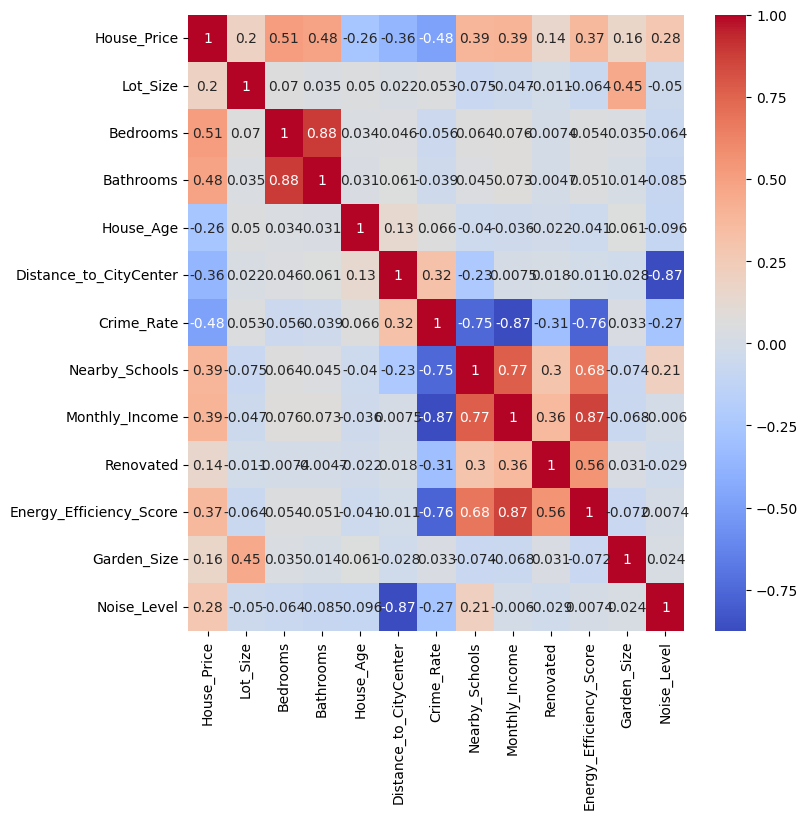

In [10]:
# We can plot the matrix to make it easier to read and understand 
plt.figure(figsize=(8, 8))

sns.heatmap(
    data=corr_matrix,
    annot=True,
    cmap="coolwarm"
)

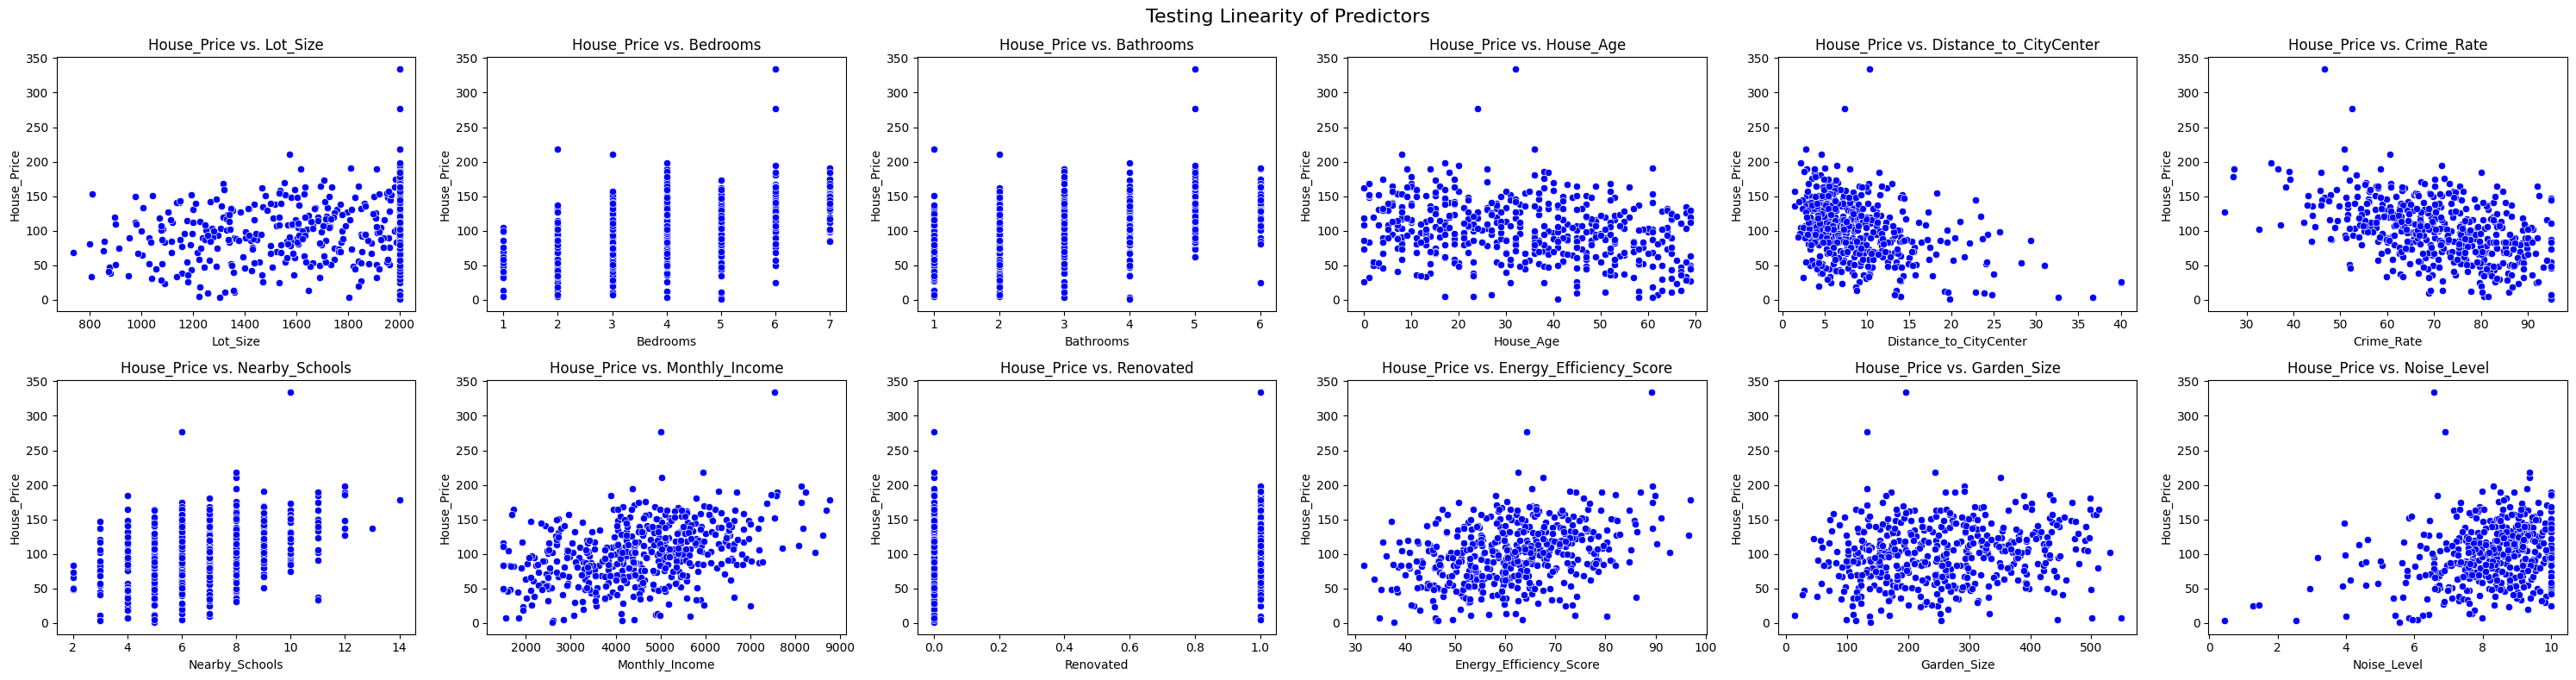

In [11]:
# We can also use scatterplots to test linearlity of the predictors and the response variable 

# Extract dependent and independent variables 
independent_variables = list(cleaned_dataset.drop(columns=["House_Price"]).columns) 

dependent_variable = "House_Price" 

# Plotting the scatterplots 
fig, ax = plt.subplots(2, 6, figsize=(30, 8)) 
ax = ax.flatten()

for index, independent_variable in enumerate(independent_variables):
    sns.scatterplot(x=cleaned_dataset[independent_variable], y=cleaned_dataset[dependent_variable], color="blue", ax=ax[index])
    ax[index].set_title(f"{dependent_variable} vs. {independent_variable}")

plt.suptitle("Testing Linearity of Predictors", fontsize=16)
fig.tight_layout()


**Notes** 

From the Scatterplots, this is what we can infer;

- `House Price vs. Distance to City Centre`: Linearity exists. The two variables exhibit inverse/negative linear trend. As distance to the city centre increases house prices decrease. 

- `House Price vs. Monthly Income`: Linearity exists. The variables exhibit a positive linear relationship. As the monthly income increase, house prices tend to increase. 

- `House Price vs. Crime Rate`: Linearity Exists. These two variables tend to exhibit a linear relationship. As the crime rate increase, house prices tend to decrease. 

- `House Price vs. Energy Efficiency Score`: Linearity exists. These two exhibit a positive linear relationship. As the energy efficiency score increases, the house prices tend to increase. 

The other predictors (`Garden Size, Noise Level, House Age, Lot Size`) demonstrate a weak linear relationship as discussed below;

- `House Price vs. House Age`: The datapoints are spread out illustrating a curvelinear trend (hence non-linear) 

- `House Price vs. Gardent Size`: The datapoints are highlly dispersed/spread suggesting posibility of very weak or no linear relationship. 

Transformatin for these variables may be considered (squaring/log) or we accept that thier weak/non linear contribution is minor. 

Overall, the core linearity assumptiong tend to be violated as most of the predictors tend to have very weak or no linear relationship. Since a simple scatterplot may not be used to confirm linearity in a Multiple Linear Regression setting, we may proceed with all the predictors but we will have to pay attention to the residuals plot. In case we discover any clear patterns on the residuals plot, we may then conclude that the linear assumption was violted. In that case, we may need to perform transformations to the predictors (use logs, squares, etc)

In [12]:
# Building the Model 

# Extract X and y 
X = dataset.drop(columns=["House_Price"])
y = dataset["House_Price"]

# Splitting the Dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# Fitting the model 
model = LinearRegression()
model.fit(X_train, y_train) 

# Make predictions 
y_predicted = model.predict(X_test) 

# Test Performance 
mae = metrics.mean_absolute_error(y_test, y_predicted)
mse = metrics.mean_absolute_error(y_test, y_predicted) 
rmse = np.sqrt(mse)
r2_score = metrics.r2_score(y_test, y_predicted)

print("---------MODEL PERFORMANCE-----------------")
print(f"MAE: {mae}\nMSE: {mse}\nRMSE: {rmse}\nR Squared: {r2_score}")

---------MODEL PERFORMANCE-----------------
MAE: 20.899425162054023
MSE: 20.899425162054023
RMSE: 4.571588910002082
R Squared: 0.5334721614608424


In [ ]:
# We can carryout the model inferences using the OLS 
formular_str = dependent_variable + " ~ " + "+".join(independent_variables) 

ols_model = sm.ols(formular_str, data=dataset).fit() 

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:            House_Price   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     81.64
Date:                Sun, 09 Nov 2025   Prob (F-statistic):          2.62e-108
Time:                        13:03:49   Log-Likelihood:                -2334.1
No. Observations:                 500   AIC:                             4694.
Df Residuals:                     487   BIC:                             4749.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

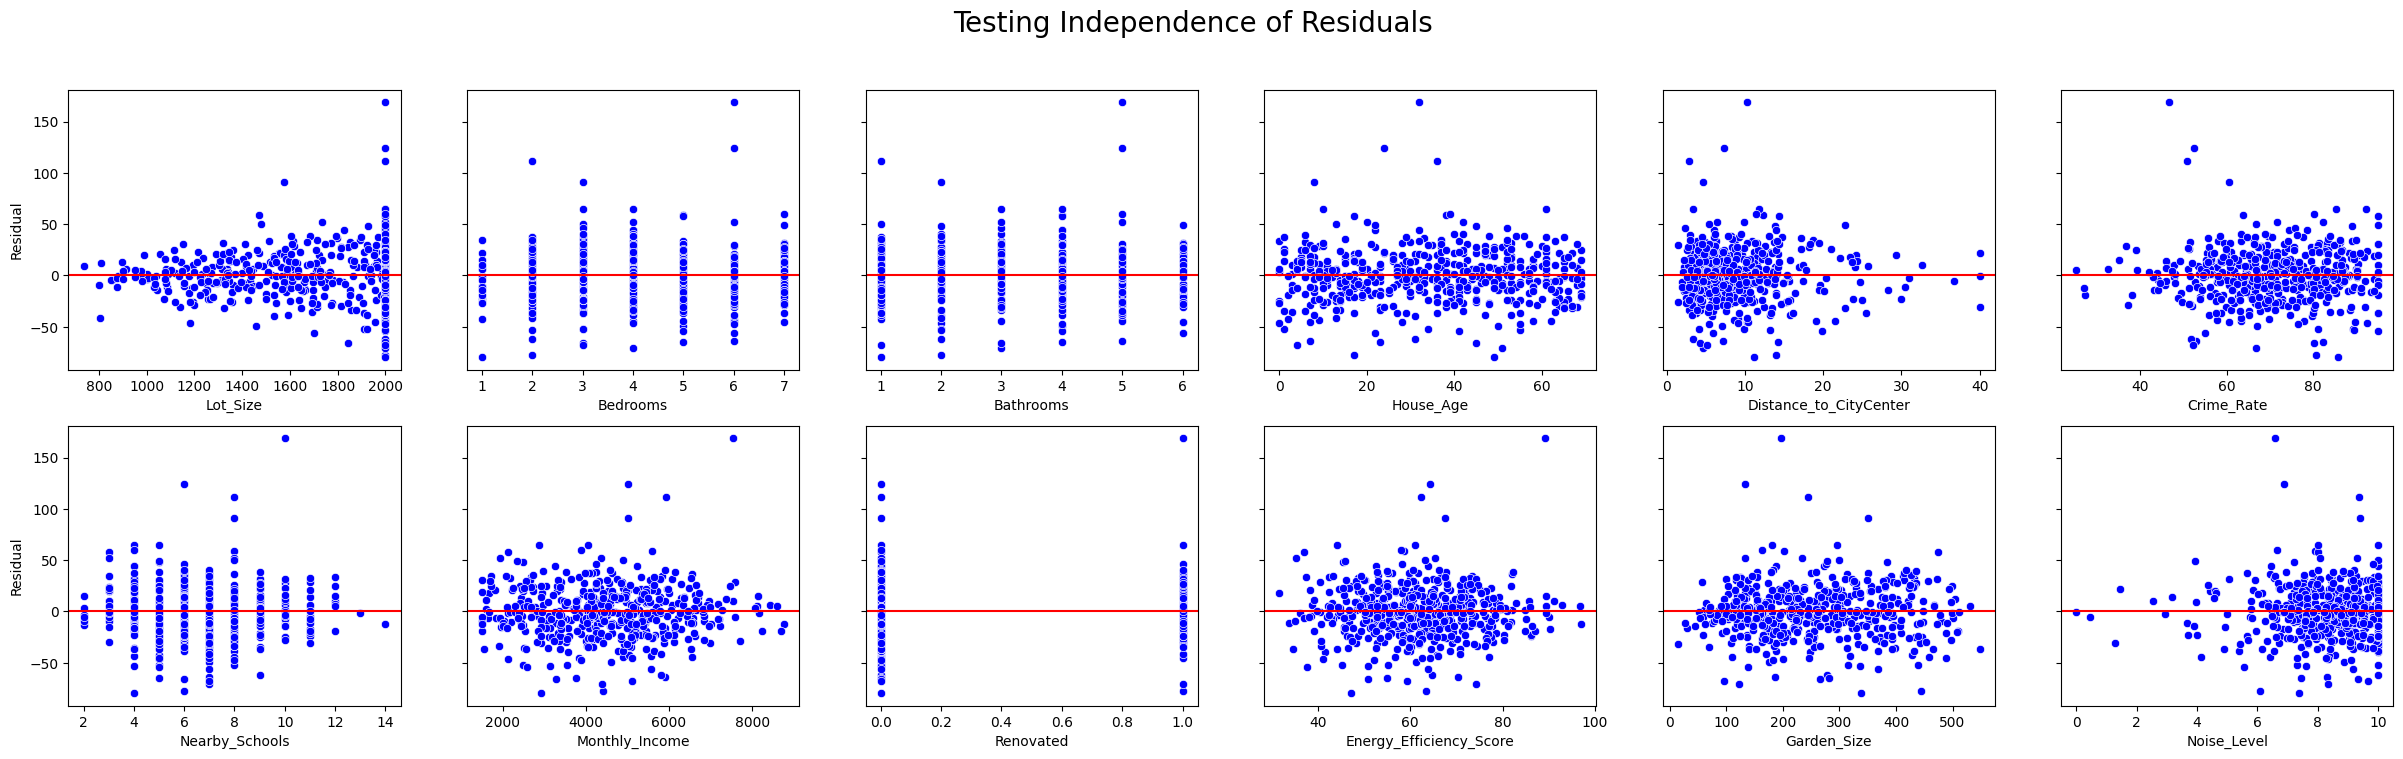

In [14]:
# We can then test the independence of the residuals (residuals vs. predictors) 
residuals = ols_model.resid 
predictors = independent_variables.copy() 

fig, ax = plt.subplots(2, 6, figsize=(30, 8), sharey=True)
ax = ax.flatten() 
plt.suptitle("Testing Independence of Residuals", fontsize=20) 

for index, predictor in enumerate(predictors):
    sns.scatterplot(x=dataset[predictor], y=residuals, color="blue", ax=ax[index])
    ax[index].axhline(y=0, linestyle="-", color="red") 
    ax[index].set_ylabel("Residual")
    


**NOTES** 

*Testing Homoscedasticity* (Homoscedasticity is violated if the vertical spread of the points changes to funnel, diamond, cone shaped patterns)

- For most of the predictors, the scatterplots exhibits random and uniform spread of points indicating that the variance of residuals is constant across all levels of predictors. There is no clear funnel/cone patterns. 

- Therefore, the assumption of Homescedasticity seems to be reasonably met, or at least, not severely violated. The variance of the errors appears to be somewhat constant across predictor levels.

__

*Testing Linearity* (Linearity is violated when the residuals show non-random patterns line a U-shaped or Curve shaped pattern)

- For most of the predictors, the points are randomly scattered around the zero red line forming a cloud. This is the ideal state suggesting that linearity is locally okay. 

In [18]:
# We can proceed further to test for Homescedasticity using the Breausch Pagan Test. 
# Here, we do a secodary regression with first regression residuals as the dependent variable 

bp_test_results = sms.het_breuschpagan(ols_model.resid, ols_model.model.exog) 

print(f"LM Stats: {bp_test_results[0]}\nLM P_Value: {bp_test_results[1]}\n\nF Stats: {bp_test_results[2]}\nF P_Value: {bp_test_results[3]}")


LM Stats: 25.50455777332894
LM P_Value: 0.012604812063626732

F Stats: 2.1813907521999067
F P_Value: 0.011614508034789037


**NOTES** 

The p-values appear to be lower than the standard 0.05 (5%) inidcating that Homescedasticity is violated. The variances of the errors are not constant across the predictor levels. 



Text(0.5, 1.0, 'Distribution of Normlized Residuals.')

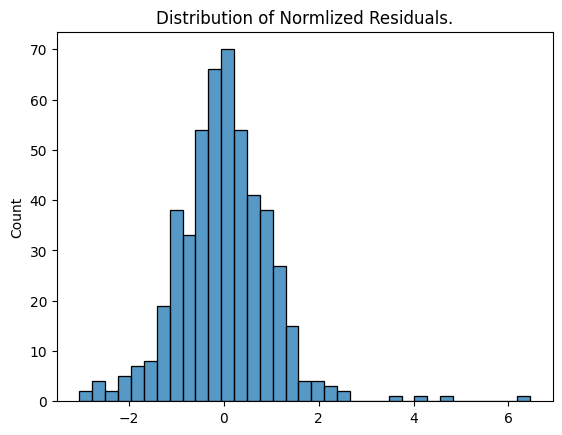

In [20]:
# We check for the normality of the residuals.
# We start ploting a histogram of normalized residuals and a QQ plot of the residuals 

# Plotting a histogram of normalized residuals 

sns.histplot(data=ols_model.resid_pearson)
plt.title("Distribution of Normlized Residuals.")

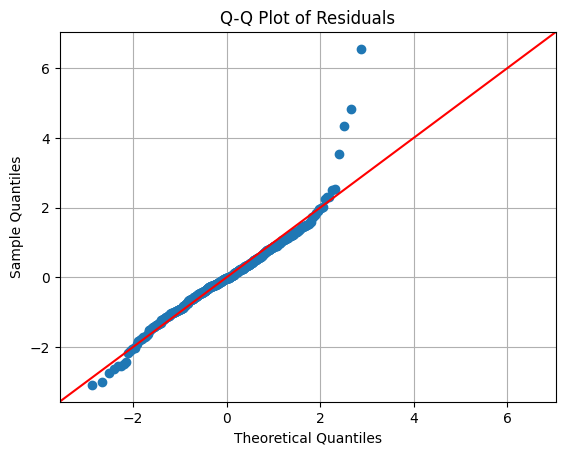

In [26]:
# the Q-Q plot of the residuals 
import statsmodels.api as sm 

sm.qqplot(ols_model.resid, line="45", fit=True)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()

**NOTES** 

- Q-Q Plot shows that a vast majority of the points between -2 and 2 lie very close to the 45-degrees line. This indicates that the central body of the residual distribution is normaly distributed. 

- However, the tails (particular the upper tail) show a significant deviation from the 45-degree line. 

- This means that the residuals are largely positively skewed indicating presense of influetial errors 

- Overall, Q-Q Plot illustrate a violation of the normality assumption due to heavy tails and positive skewness.


Text(0.5, 1.0, "Cook's Distance Plot for Residuals")

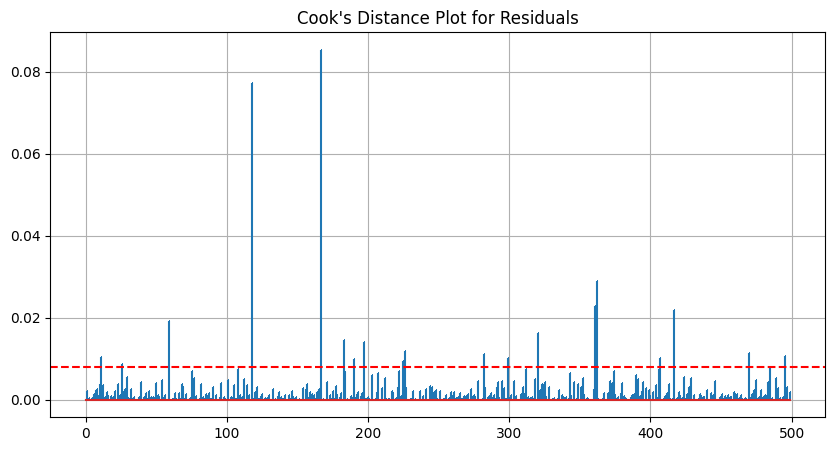

In [55]:
# Let's Check the outliers and whether they influence the model 
# We can do this through Cook's Distance 
# We test this by;
# 1. Distance of the observation from the center of the other predictors (X Space)
# 2. Residuals: residuals are far away from the regression line (Y Space)
# influential predictors will have a Cook's distance greater than 4/sample_size or greater than one for stricter threshold

# Getting the influence 
influence = ols_model.get_influence()
cooks_distance = influence.cooks_distance[0]

sample_size = len(cooks_distance) 

fig, ax = plt.subplots(figsize=(10, 5))
ax.stem(np.arange(sample_size), cooks_distance, markerfmt=",")
ax.axhline(y=4/sample_size, color="red", linestyle="--")
plt.grid(True)
plt.title("Cook's Distance Plot for Residuals")

It appears that the values around index 125 and 175 are largely influential with cook's distance significantly large that the rest. There are outliers and my require close examination. 